In [ ]:
## fake_transactional_data_24.csv

In [ ]:
## Libraries needed

# Analysing Data

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
## load data set
data = pd.read_csv('fake_transactional_data_24.csv')

In [5]:
## head
data.head()

,from_totally_fake_account,monopoly_money_amount,to_randomly_generated_account,not_happened_yet_date
0,10371.0,4.00,CINEMA,01/01/2025
1,88339.0,2.40,40544,01/01/2025
2,18555.0,2.40,85149,01/01/2025
3,18555.0,4.10,HIPSTER_COFFEE_SHOP,01/01/2025
4,80792.0,1.95,18555,01/01/2025


## Finding missing values- EDA

In [6]:
data.isnull()  ##missing values

,from_totally_fake_account,monopoly_money_amount,to_randomly_generated_account,not_happened_yet_date
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
10148275,False,False,False,False
10148276,False,False,False,False
10148277,False,False,False,False
10148278,False,False,False,False


In [7]:
data.isnull().sum()

from_totally_fake_account        0
monopoly_money_amount            0
to_randomly_generated_account    0
not_happened_yet_date            0
dtype: int64

In [8]:
data.shape

(10148280, 4)

In [9]:
## statistical data
data.describe()

,from_totally_fake_account,monopoly_money_amount
count,1.014828e+07,1.014828e+07
mean,5.080502e+04,1.839348e+01
std,2.893710e+04,8.612323e+01
min,1.000000e+03,1.450000e+00
25%,2.530400e+04,2.650000e+00
50%,5.078100e+04,6.000000e+00
75%,7.563300e+04,1.200000e+01
max,1.009880e+05,1.995000e+03


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10148280 entries, 0 to 10148279
Data columns (total 4 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   from_totally_fake_account      float64
 1   monopoly_money_amount          float64
 2   to_randomly_generated_account  object 
 3   not_happened_yet_date          object 
dtypes: float64(2), object(2)
memory usage: 309.7+ MB


In [11]:
data.dtypes

from_totally_fake_account        float64
monopoly_money_amount            float64
to_randomly_generated_account     object
not_happened_yet_date             object
dtype: object

In [12]:
data.nunique() ##any unique values??

from_totally_fake_account         8142
monopoly_money_amount             5236
to_randomly_generated_account    14300
not_happened_yet_date              364
dtype: int64

# Outliers

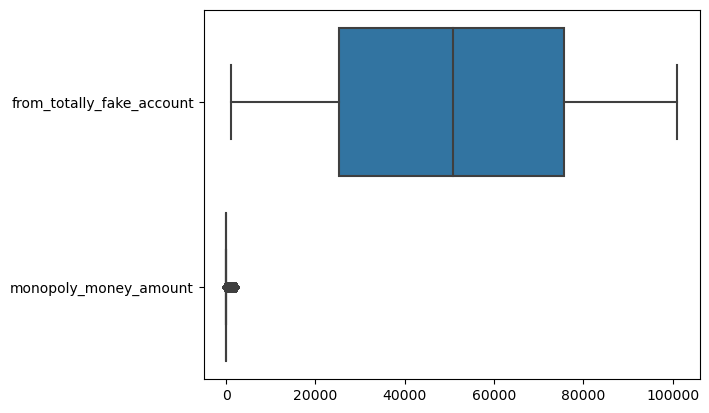

In [16]:
## finding outliers
# Box plots 
sns.boxplot(data=data, orient='h')
plt.show()

### Finding outliers count in  ' from_totally_fake_account '

In [17]:
data['from_totally_fake_account'].skew           ##skew method
## finding IQR
percentile25= data['from_totally_fake_account'].quantile(0.25)
percentile75= data['from_totally_fake_account'].quantile(0.75)
percentile75

75633.0

In [18]:
iqr= percentile75-percentile25
upperlimit=percentile75+ 1.5 *iqr
lowerlimit= percentile75 - 1.5 *iqr
print("Upper limit", upperlimit)
print("Lower limit", lowerlimit)

Upper limit 151126.5
Lower limit 139.5


In [19]:
outliers_count_from_account = len(data[(data['from_totally_fake_account'] < lowerlimit) | (data['from_totally_fake_account'] > upperlimit)])
print("Outliers in 'from_totally_fake_account':", outliers_count_from_account)


Outliers in 'from_totally_fake_account': 0


### Finding outliers count in  ' monopoly_money_amount '

In [20]:
data['monopoly_money_amount'].skew           ##skew method
## finding IQR
percentile25= data['monopoly_money_amount'].quantile(0.25)
percentile75= data['monopoly_money_amount'].quantile(0.75)
percentile75

12.0

In [21]:
iqr= percentile75-percentile25
upperlimit=percentile75+ 1.5 *iqr
lowerlimit= percentile75 - 1.5 *iqr
print("Upper limit", upperlimit)
print("Lower limit", lowerlimit)

Upper limit 26.025
Lower limit -2.0249999999999986


In [22]:
outliers_count_monopoly_amount = len(data[(data['monopoly_money_amount'] < lowerlimit) | (data['monopoly_money_amount'] > upperlimit)])
print("Outliers count in 'monopoly_money_amount':", outliers_count_monopoly_amount)

Outliers count in 'monopoly_money_amount': 1008638


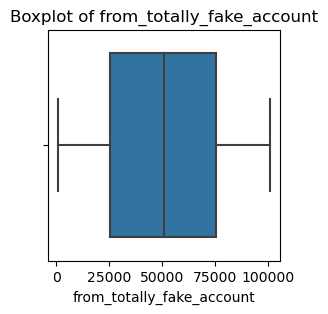

In [27]:
# Box plot for 'from_totally_fake_account'
plt.figure(figsize=(3, 3))
sns.boxplot(x=data['from_totally_fake_account'])
plt.title('Boxplot of from_totally_fake_account')
plt.xlabel('from_totally_fake_account')
plt.show()

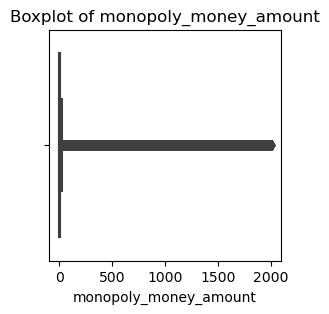

In [28]:
# Box plot for 'monopoly_money_amount'
plt.figure(figsize=(3,3))
sns.boxplot(x=data['monopoly_money_amount'])
plt.title('Boxplot of monopoly_money_amount')
plt.xlabel('monopoly_money_amount')
plt.show()

# Visualisation

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Visualizing the distribution of a categorical variable 'category_column'
plt.figure(figsize=(10, 6))
sns.countplot(x='category_column', data=data)
plt.title('Distribution of Category Column')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

ValueError: Could not interpret input 'category_column'

<Figure size 1000x600 with 0 Axes>

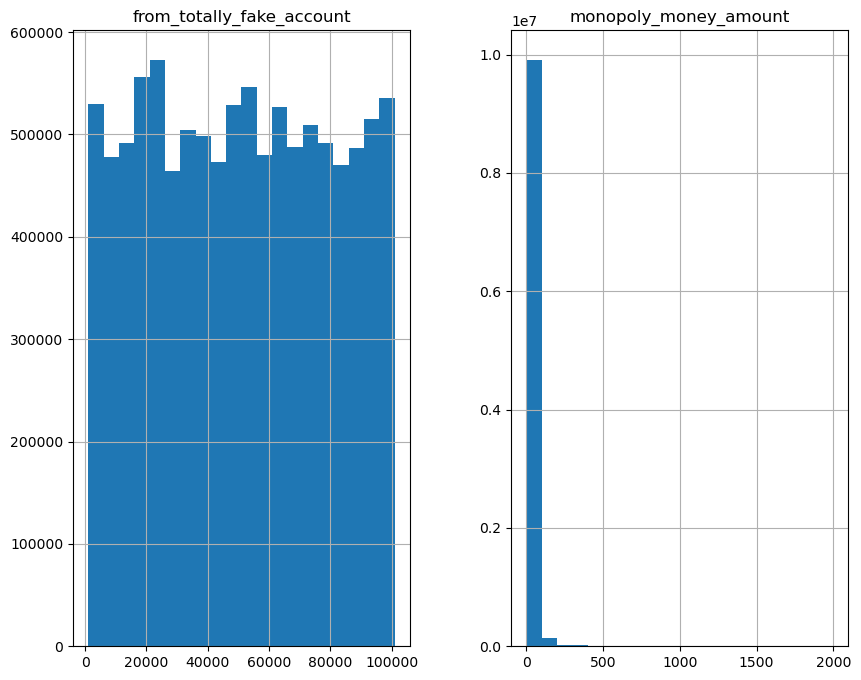

In [13]:
data.hist(figsize=(10, 8), bins=20)
plt.show()

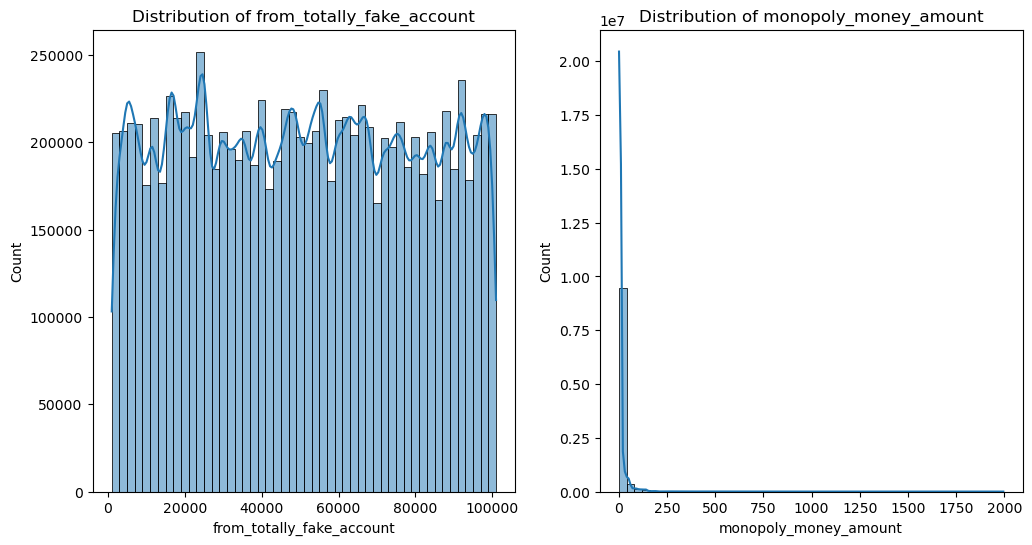

In [14]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data['from_totally_fake_account'], bins=50, kde=True)
plt.title('Distribution of from_totally_fake_account')

plt.subplot(1, 2, 2)
sns.histplot(data['monopoly_money_amount'], bins=50, kde=True)
plt.title('Distribution of monopoly_money_amount')

plt.show()


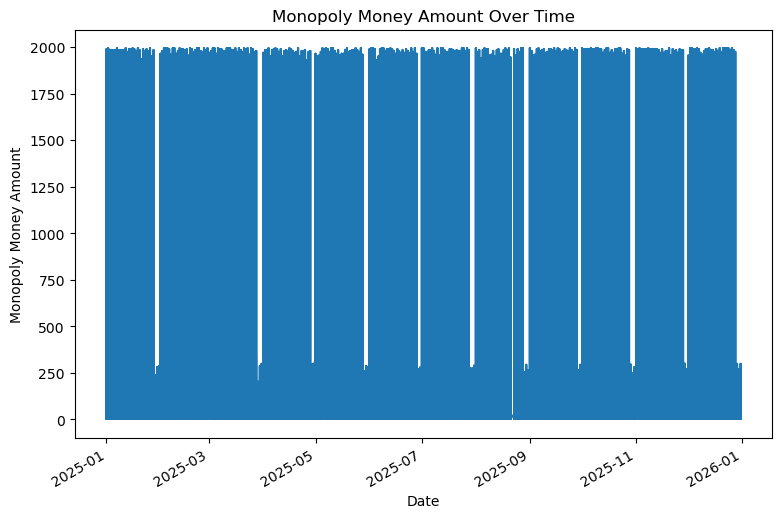

In [15]:
# Convert the 'not_happened_yet_date' column to datetime with 'coerce' error handling
data['not_happened_yet_date'] = pd.to_datetime(data['not_happened_yet_date'], errors='coerce')

# Time series plot
plt.figure(figsize=(9, 6))
data.set_index('not_happened_yet_date')['monopoly_money_amount'].plot()
plt.title('Monopoly Money Amount Over Time')
plt.xlabel('Date')
plt.ylabel('Monopoly Money Amount')
plt.show()

<Figure size 1500x1200 with 0 Axes>

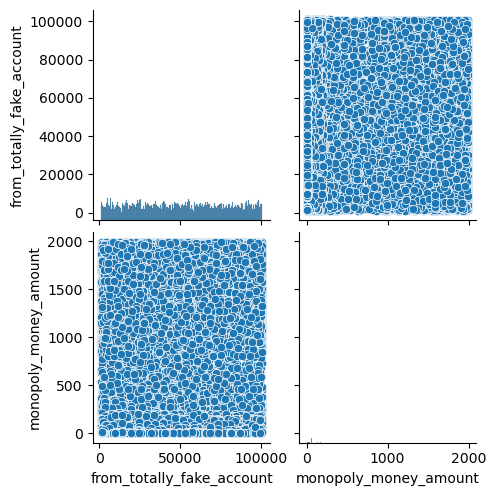

In [34]:
sns.pairplot(data)
plt.show()

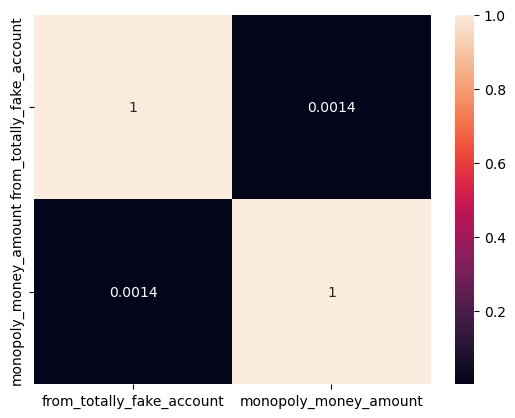

In [23]:
numeric_data = data.select_dtypes(include=[np.number])
corr_matrix = numeric_data.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()
##, cmap='coolwarm'

# Identify patterns

In [ ]:
## Identify Frequency and Patterns in Transaction Amount

# Calculate the frequency of transactions for each customer
transaction_frequency = data['from_totally_fake_account'].value_counts()

# Visualize transaction frequency
plt.figure(figsize=(12, 6))
sns.histplot(transaction_frequency, bins=50, kde=True)
plt.title('Transaction Frequency Distribution')
plt.xlabel('Number of Transactions')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Analyze transaction amounts to identify patterns
# Consider statistical measures
mean_transaction_amount = data['monopoly_money_amount'].mean()
median_transaction_amount = data['monopoly_money_amount'].median()

# Visualization tools
plt.figure(figsize=(10, 6))
sns.histplot(data['monopoly_money_amount'], bins=50, kde=True)
plt.title('Distribution of Monopoly Money Amount')
plt.xlabel('Monopoly Money Amount')
plt.ylabel('Frequency')
plt.show()

# Box plot to identify patterns and outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x=data['monopoly_money_amount'])
plt.title('Boxplot of Monopoly Money Amount')
plt.show()

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data[['monopoly_money_amount']])
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Feature scaling for better clustering results
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['monopoly_money_amount']])

# Determine the optimal number of clusters using the elbow method
def determine_optimal_k(data):
    distortions = []
    K_range = range(1, 11)  # You can adjust the range based on your dataset and requirements
    
    for k in K_range:
        kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans.fit(data)
        distortions.append(kmeans.inertia_)

    # Plotting the elbow graph
    plt.figure(figsize=(8, 4))
    plt.plot(K_range, distortions, marker='o')
    plt.title('Elbow Method for Optimal k')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Distortion')
    plt.show()

# Call the function to determine the optimal number of clusters
determine_optimal_k(scaled_data)


In [ ]:
# Example: Offer discounts based on cluster preferences
for cluster_id in range(k):
    cluster_data = data[data['Cluster'] == cluster_id]
    # Implement personalized offers for each cluster

In [ ]:
# Select the categorical feature
categorical_feature = 'to_randomly_generated_account'

# One-hot encode the selected categorical feature
data_encoded = pd.get_dummies(data, columns=[categorical_feature], prefix=categorical_feature)

# Combine numerical features with the one-hot encoded features
X_combined = pd.concat([data[['from_totally_fake_account', 'monopoly_money_amount']], data_encoded.filter(regex=categorical_feature+'_')], axis=1)

# Scale the features
scaler = StandardScaler()
X_combined_scaled = scaler.fit_transform(X_combined)

# Determine the optimal number of clusters (k)
visualizer = KElbowVisualizer(KMeans(random_state=42), k=(2, 10))
visualizer.fit(X_combined_scaled)
k = visualizer.elbow_value_

# Apply K-means clustering to the combined features
kmeans = KMeans(n_clusters=k, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_combined_scaled)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Load the dataset
data = pd.read_csv('fake_transactional_data_24.csv')

# Preprocessing: Select relevant features and scale the data
X = data[['from_totally_fake_account', 'monopoly_money_amount']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the number of clusters for K-means
n_clusters = 3

# Perform K-means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=10)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Perform Agglomerative Hierarchical Clustering
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
agg_labels = agg_clustering.fit_predict(X_scaled)

# Evaluate clustering using silhouette score
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
dbscan_silhouette = silhouette_score(X_scaled, dbscan_labels)
agg_silhouette = silhouette_score(X_scaled, agg_labels)

print(f"Silhouette Score (K-means): {kmeans_silhouette}")
print(f"Silhouette Score (DBSCAN): {dbscan_silhouette}")
print(f"Silhouette Score (Agglomerative): {agg_silhouette}")

# Visualize the clustering results
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.scatterplot(data=data, x='from_totally_fake_account', y='monopoly_money_amount', hue=kmeans_labels, palette='viridis')
plt.title('K-means Clustering')
plt.xlabel('From Totally Fake Account')
plt.ylabel('Monopoly Money Amount')

plt.subplot(1, 3, 2)
sns.scatterplot(data=data, x='from_totally_fake_account', y='monopoly_money_amount', hue=dbscan_labels, palette='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('From Totally Fake Account')
plt.ylabel('Monopoly Money Amount')

plt.subplot(1, 3, 3)
sns.scatterplot(data=data, x='from_totally_fake_account', y='monopoly_money_amount', hue=agg_labels, palette='viridis')
plt.title('Agglomerative Clustering')
plt.xlabel('From Totally Fake Account')
plt.ylabel('Monopoly Money Amount')

plt.show()


C:\Users\bu23957\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KeyboardInterrupt: 